# SARSA (State-Action-Reward-State-Action) Algorithm

## What Is SARSA?
__State-action-reward-state-action ($SARSA$)__ is an __on-policy__ algorithm designed to teach a machine learning model a new [Markov decision process](https://builtin.com/machine-learning/markov-decision-process) policy in order to solve reinforcement learning challenges. It’s an algorithm where, in the current state ($S$), an action ($A$) is taken and the agent gets a reward ($R$), and ends up in the next state ($S'$), and takes action ($A'$) in $S'$. Therefore, the tuple $(S, A, R, S', A')$ stands for the acronym $SARSA$.

![](https://miro.medium.com/v2/resize:fit:700/1*lz0hcYpEfDxny8rKOYBRvg.png)

### Steps in SARSA

1.  **Initialize the Q-table**: Assign a value of $0$ to all entries.
2.  **Choose an action**: Use an ``ε`` greedy strategy to balance exploration and exploitation.
3.  **Take the action**: Observe the reward and the next state, then choose the next action using the current policy.
4.  **Update the Q-table**: Use the $SARSA$ update rule to update the Q-values.
5.  **Repeat**: Continue until the episode ends.

![](https://www.researchgate.net/profile/Vladimir-Golovko-5/publication/266874960/figure/fig1/AS:295570439720968@1447480893013/One-iteration-of-Reinforcement-Learning-SARSA-algorithm-1-Where-learning-rate.png)

SARSA involves the agent interacting with the environment and updating a Q-table that contains Q-values for all possible state-action pairs. The agent uses these Q-values to make decisions that balance exploration and exploitation, aiming to maximize its expected cumulative reward. The Q-value for a state-action pair (s, a) is updated using the SARSA rule, which incorporates the reward received and the Q-value of the next state-action pair.

### Detailed Explanation of the Algorithm

-   **Exploration-Exploitation Strategy**: The agent must balance exploration (trying new actions to discover their effects) and exploitation (choosing actions that are known to yield high rewards). The ε-greedy strategy is commonly used, where the agent chooses a random action with probability ε, and the best-known action with probability 1-ε.
-   **Q-Table Initialization**: The Q-table is initialized with arbitrary values, often zeros. It has dimensions `[number of states, number of actions]`.
-   **State and Action**: The agent starts in an initial state and chooses an action based on the current Q-values and the exploration-exploitation strategy.
-   **Reward and Next State**: After taking an action, the agent receives a reward and observes the next state. It then chooses the next action based on the current policy.
-   **Q-Value Update**: The Q-value for the state-action pair is updated using the SARSA rule, incorporating the observed reward and the Q-value of the next state-action pair.
-   **Episode Termination**: The episode terminates when the agent reaches a terminal state (e.g., completing a task or reaching a goal).

### SARSA Update Rule

The SARSA update rule is given by:

$$ Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left( r_t + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \right) $$

where:

- $ Q(s_t, a_t) $: Current Q-value.
- $ \alpha $: Learning rate (0 < α ≤ 1). It determines how much new information overrides the old information.
- $ r_t $: Reward received after taking action $ a $ from state $ s $.
- $ \gamma $: Discount factor (0 ≤ γ ≤ 1) which balances the importance of immediate and future rewards. A higher value of γ puts more emphasis on future rewards.
- $ s_{t+1} $: Next state after taking action $ a_t $.
- $ a_{t+1} $: Next action chosen based on the current policy.


## On-Policy vs Off-Policy Learning
#### On-Policy Learning
On-policy learning algorithms, like SARSA, learn the value of the policy being followed by the agent. The updates are based on the actions taken by the agent using the current policy. The agent learns from the actions it actually takes.

#### Off-Policy Learning
Off-policy learning algorithms, like Q-learning, learn the value of the optimal policy, regardless of the actions taken by the agent. The updates are based on the maximum possible future reward, assuming the best possible action is taken. The agent learns from hypothetical optimal actions.

## SARSA vs. Q-Learning

The main difference between SARSA and Q-learning is that SARSA is an on-policy learning algorithm, while Q-learning is an off-policy learning algorithm. 

In reinforcement learning, two different policies are also used for active agents: a behavior policy and a target policy. A behavior policy is used to decide actions in a given state (what behavior the agent is currently using to interact with its environment), while a target policy is used to learn about desired actions and what rewards are received (the ideal policy the agent seeks to use to interact with its environment).

If an algorithm’s behavior policy matches its target policy, this means it is an on-policy algorithm. If these policies in an algorithm don’t match, then it is an off-policy algorithm. 

SARSA operates by choosing an action following the current epsilon-greedy policy and updates its Q-values accordingly. On-policy algorithms like SARSA select random actions where non-greedy actions have some probability of being selected, providing a balance between exploitation and exploration techniques. Since SARSA Q-values are generally learned using the same epsilon-greedy policy for behavior and target, it classifies as on-policy.

Q-learning, unlike SARSA, tends to choose the greedy action in sequence. A greedy action is one that gives the maximum Q-value for the state, that is, it follows an optimal policy. Off-policy algorithms like Q-learning learn a target policy regardless of what actions are selected from exploration. Since Q-learning uses greedy actions, and can evaluate one behavior policy while following a separate target policy, it classifies as off-policy.

<img src="https://wikidocs.net/images/page/169313/22_SARSA_vs_Q_Learning.png" width=800>

#### Q-Learning (Off-Policy)

-   **Update Rule**: Uses the maximum possible future reward for the next state.
-   **Policy**: Off-policy, meaning the update is based on the optimal policy, not necessarily the current policy used to explore.

#### SARSA (On-Policy)

-   **Update Rule**: Uses the actual next action taken by the policy.
-   **Policy**: On-policy, meaning the update is based on the current policy being followed by the agent.
  
<img src="https://miro.medium.com/v2/resize:fit:1400/1*IO3w_u0snQVvHE3k-t_yEw.png" width=700>

### An Example: Cliff World[](https://www.baeldung.com/cs/q-learning-vs-sarsa#1-an-example-cliff-world)

We can highlight the effect of this seemingly small difference by using a simple grid-world-based problem; The Cliff World. **In a cliff world, the agent has to walk from the starting cell to the goal cell along the edge of a cliff; without falling off.**

There is a ![-1](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-37abf2e602a43ae0ff9f12b1536fa74c_l3.svg "Rendered by QuickLaTeX.com") penalty for a step and a ![-100](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-a8453ae8f384cb6445bc89830c12a4da_l3.svg "Rendered by QuickLaTeX.com") penalty for stepping off the cliff. The shortest path is a straight line along the cliff edge. It is the shortest path but it is risky if the agents miss-step there is a large negative penalty.

The cliff world is drawn from [Reinforcement Learning: An Introduction by Sutton and Barto](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf "Reinforcement Learning: An Introduction by Sutton and Barto"); a seminal text of the field:

![Rendered by QuickLaTeX.com](https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-dc826669b6e285029de33ecf9ad6fbc0_l3.svg "Rendered by QuickLaTeX.com")

While we know the shortest path, our Q-learning and SARSA agents will disagree over if it is the best or not. Our, on-policy, SARSA agent views the cliff edge as riskier because it chooses and updates actions subject to its stochastic policy. **That means it has learned it has a high likelihood of stepping off the cliff and receiving a high negative reward.**

Our Q-learning agent by contrast has learned its policy based on the optimal policy which always chooses the action with the highest Q-value. It is more confident in its ability to walk the cliff edge without falling off.

In the Cliff Walking environment, this difference means:

-   **SARSA**: Tends to be more conservative, avoiding the risky cliff edges because it updates based on the policy's chosen actions, which includes some exploration.
-   **Q-Learning**: Can learn the optimal path directly along the cliff edge, since it updates based on the best possible action regardless of the current policy.


## Cliff World: Gym implementation

The Cliff Walking environment consists of a grid where the agent must navigate from the start to the goal without falling off the cliff.

### Step 1: Import Libraries and Initialize the Environment

First, we need to import the necessary libraries and create the Cliff Walking environment.

In [1]:
#!pip install gym
#!pip install pygame
import numpy as np
import gym
import random

# Create Cliff Walking environment
env = gym.make("CliffWalking-v0")

### Step 2: Initialize the Q-Table

Next, we initialize the Q-table with zeros. The Q-table has dimensions `[number of states, number of actions]`.

-   `state_size`: The total number of possible states.
-   `action_size`: The total number of possible actions.
-   `q_table`: A table to store Q-values for each state-action pair, initialized to zero.

In [2]:
# Initialize Q-table
state_size = env.observation_space.n  # Total number of states
action_size = env.action_space.n      # Total number of actions
q_table = np.zeros((state_size, action_size))
print("State space:", state_size)
print("Action space:", action_size) 

State space: 48
Action space: 4


### Step 3: Define Hyperparameters

We define the hyperparameters for the Q-learning algorithm.

-   `learning_rate (α)`: Determines how much new information overrides old information.
-   `discount_rate (γ)`: Balances the importance of immediate and future rewards.
-   `epsilon`: The probability of choosing a random action (exploration).
-   `decay_rate`: The rate at which `epsilon` decreases.

In [3]:
# Hyperparameters
learning_rate = 0.1  # Alpha, learning rate
discount_rate = 0.99  # Gamma, discount factor
epsilon = 1.0       # Exploration rate
decay_rate = 0.001    # Decay rate for epsilon

### Step 4: Train the SARSA Agent

We train the agent over a number of episodes. In each episode, the agent interacts with the environment and updates the Q-table based on its experiences.

-   `env.reset()`: Resets the environment to the initial state at the beginning of each episode.
-   `random.uniform(0, 1) < epsilon`: Determines whether to explore or exploit.
-   `env.action_space.sample()`: Selects a random action (exploration).
-   `np.argmax(q_table[state])`: Selects the action with the highest Q-value (exploitation).
-   `env.step(action)`: Executes the action and returns the next state, reward, and done flag.
-   `q_table[state, action]`: Updates the Q-value using the SARSA update rule

In [4]:
from IPython.display import clear_output
import time
import pickle as pkl

# Training variables
num_episodes = 1000  # Total number of episodes
max_steps = 50      # Max steps per episode
epsilon_decayed = 1.0

# To store total rewards for each episode
rewards = []

# Policy function for epsilon-greedy action selection
def policy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

# Training the SARSA agent
for episode in range(num_episodes):
    state, _ = env.reset()
    action = policy(state, epsilon)
    done = False
    total_reward = 0

    for _ in range(max_steps):
        next_state, reward, done, truncated, _ = env.step(action)
        next_action = policy(next_state, epsilon_decayed)
        
        # SARSA Update rule
        q_table[state, action] += learning_rate * (reward + discount_rate * q_table[next_state, next_action] - q_table[state, action])
        
        state, action = next_state, next_action
        total_reward += reward

        # Render the environment
        clear_output(wait=True)
        # env.render()
        # time.sleep(0.01)

        if done or truncated:
            break

    rewards.append(total_reward)
    epsilon_decayed = np.exp(-decay_rate * episode)
    print(f"Episode {episode + 1}: Total Reward: {total_reward}, Epsilon: {epsilon_decayed}")

env.close()

# Save the Q-table
pkl.dump(q_table, open("sarsa_q_table.pkl", "wb"))
print("Training Complete! Q-table saved!")

Episode 1000: Total Reward: -32, Epsilon: 0.3682475046136629
Training Complete! Q-table saved!


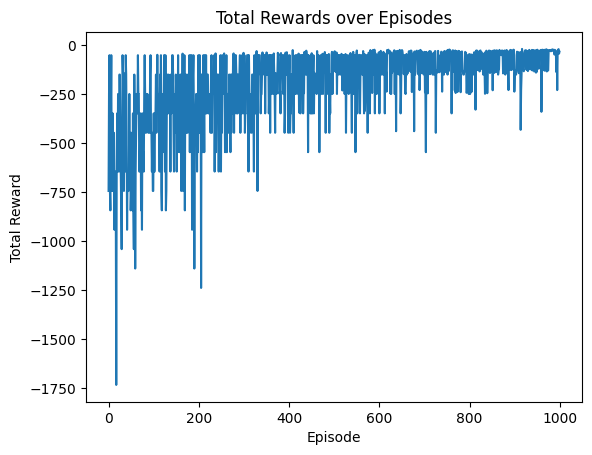

In [5]:
import matplotlib.pyplot as plt
# Plotting rewards over time
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards over Episodes')
plt.show()

## Step 5: Visualize the Agent's Performance

Finally, we visualize the agent's performance by rendering the environment.

-   Renders the environment to visualize the agent's actions.

In [6]:
import pickle as pkl
file = open('sarsa_q_table.pkl', 'rb')
q_table = pkl.load(file)

from IPython.display import clear_output
from time import sleep

# Watch the trained agent
env = gym.make("CliffWalking-v0", render_mode='human')
state, info = env.reset()
done = False
rewards = 0

for s in range(max_steps):
    clear_output(wait=True)
    env.render()  # Render the environment in the human mode
    action = np.argmax(q_table[state])
    next_state, reward, done, truncated, info = env.step(action)
    rewards += reward
    print(f"Step {s+1}, Total Reward: {rewards}")

    state = next_state

    if done or truncated:
        break

env.close()

Step 17, Total Reward: -17
